In [1]:
!pip install pypdf2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.8 MB/s eta 0:00:00


In [2]:
import PyPDF2
a=PyPDF2.PdfReader('Charaka Samhita Sutrasthana Made Easy - Dr JV Hebbar.pdf')
print(a.metadata)


{'/Author': 'JVHebbar', '/Creator': 'Microsoft® Office Word 2007', '/CreationDate': "D:20180512182906+05'30'", '/ModDate': "D:20180512182906+05'30'", '/Producer': 'Microsoft® Office Word 2007'}


In [3]:
print(len(a.pages))

1385


In [5]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 62.7 MB/s eta 0:00:00


In [6]:
import fitz  # PyMuPDF
import re
import csv

# Predefined Ayurveda terms and their classifications
ayurveda_terms = {
    'Ashwagandha': 'Medical Plant',
    'Triphala': 'Treatment',
    'Neem': 'Medical Plant',
    'Pitta': 'Symptom',
    'Vata': 'Symptom',
    'Kapha': 'Symptom',
    'Diabetes': 'Disease',
    'Jwara': 'Disease',
    'Rakta': 'Ingredient',
    'Svedana': 'Treatment'
}

# Step 1: Extract text from the PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text_data = []

    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text = page.get_text("text")
        text_data.append(text.strip())

    return ' '.join(text_data)  # Return all text as a single string

# Step 2: Extract Ayurveda terms and classify them
def extract_ayurveda_terms(text, ayurveda_terms):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)  # Split text into sentences
    extracted_terms = []

    for sentence in sentences:
        for term, classification in ayurveda_terms.items():
            if term.lower() in sentence.lower():
                extracted_terms.append([term, sentence.strip(), classification])

    return extracted_terms

# Step 3: Write results to CSV
def write_to_csv(extracted_terms, csv_file):
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['SL No.', 'Ayurveda Term', 'Sentence where it appears', 'Classification'])

        for i, (term, sentence, classification) in enumerate(extracted_terms, start=1):
            writer.writerow([i, term, sentence, classification])

# Main function to convert PDF to CSV
def pdf_to_ayurveda_csv(pdf_path, csv_file):
    # Extract text from the PDF
    text = extract_text_from_pdf(pdf_path)

    # Extract Ayurveda terms and classify them
    extracted_terms = extract_ayurveda_terms(text, ayurveda_terms)

    # Write the extracted terms and classifications to a CSV file
    write_to_csv(extracted_terms, csv_file)
    print(f"Data extracted and saved to {csv_file}")

# Example usage
pdf_file = 'Charaka Samhita Sutrasthana Made Easy - Dr JV Hebbar.pdf'
output_csv = 'ayurveda_terms_classification.csv'

# Convert PDF to CSV
pdf_to_ayurveda_csv(pdf_file, output_csv)


Data extracted and saved to ayurveda_terms_classification.csv


In [7]:
import pandas as pd
df=pd.read_csv('ayurveda_terms_classification.csv')
df

,SL No.,Ayurveda Term,Sentence where it appears,Classification
0,1,Pitta,Dr JV Hebbar – easyayurveda.com – Charaka Samh...,Symptom
1,2,Vata,Dr JV Hebbar – easyayurveda.com – Charaka Samh...,Symptom
2,3,Kapha,Dr JV Hebbar – easyayurveda.com – Charaka Samh...,Symptom
3,4,Pitta,Ayurveda \n17.4 Madhumeha – Ayurvedic understa...,Symptom
4,5,Vata,Ayurveda \n17.4 Madhumeha – Ayurvedic understa...,Symptom
...,...,...,...,...
2259,2260,Vata,How To Keep Vata Balance While Travelling?,Symptom
2260,2261,Pitta,Amla Remedy For Pitta Balance \n18.,Symptom
2261,2262,Pitta,"How To Use Ghee, Externally For Pitta Balance ...",Symptom
2262,2263,Kapha,Ginger Home Remedy For Kapha Balance \n20.,Symptom


<ipython-input-8-6009ca85fd63>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=term_counts.index, y=term_counts.values, palette='viridis')


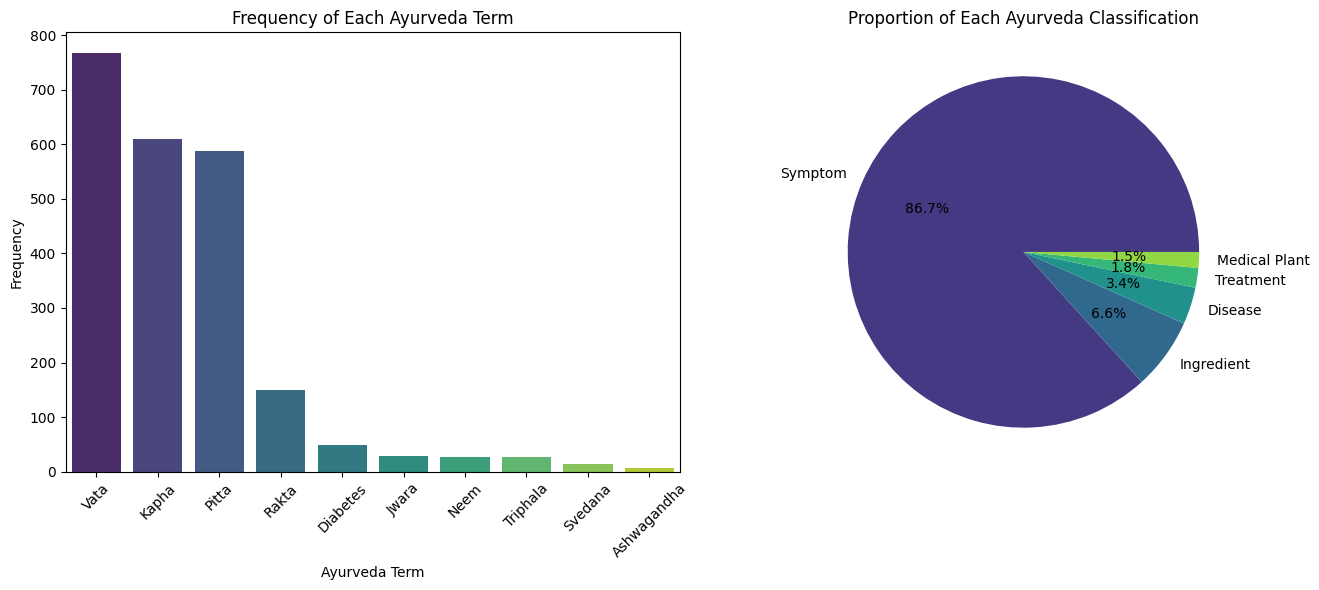

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('ayurveda_terms_classification.csv')

# Count the frequency of each term
term_counts = df['Ayurveda Term'].value_counts()

# Plot the bar chart
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=term_counts.index, y=term_counts.values, palette='viridis')
plt.xlabel('Ayurveda Term')
plt.ylabel('Frequency')
plt.title('Frequency of Each Ayurveda Term')
plt.xticks(rotation=45)

# Count the frequency of each classification
classification_counts = df['Classification'].value_counts()

# Plot the pie chart
plt.subplot(1, 2, 2)
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(classification_counts)))
plt.title('Proportion of Each Ayurveda Classification')

plt.tight_layout()
plt.show()
